## Project Planning Stage(Individual)

### (1) Data Description

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(knitr) # For creating nice tables
library(lubridate) # For handling date-time objects
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
### Load the datasets
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")
players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


The project utilizes two datasets: `players.csv` (196 observations or players, 7 variables) and `sessions.csv` (1,535 observations or sessions, 5 variables).  

##### `players.csv` Variables:


In [3]:
glimpse (players)

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


##### `sessions.csv` Variables:

In [4]:
glimpse(sessions)

Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


We will wrangle this data to create `number_of_sessions` and `avg_session_duration` as new Explanatory Variables.

### (2) Questions

#### Broad Question:
Q1: "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"  
#### Specific Predictive Question:  
Can a player's demographics (`Age`, `gender`, `experience`) and summary behaviors (`played_hours`, `avg_session_duration`, `number_of_sessions`) predict if they subscribe?

#### Wrangling Plan:

1. Load `players.csv` and `sessions.csv`.

2. Calculate `session_duration_min` using `start_time` and `end_time`.

3. Group by `hashedEmail` and `summarise()` to get `number_of_sessions` and `avg_session_duration`.

4. `left_join()` the summary onto `players.csv`.

5. `replace_na()` to fill session metrics with 0.

6. This creates the `analysis_data` tibble for modeling.

### (3) Exploratory Data Analysis and Visualization

First, let's compute the mean value for each quantitative variable in `players.csv`.

In [5]:
mean_table <- players |>
  select(Age, played_hours) |>
  summarise(
    mean_age = mean(Age, na.rm = TRUE),
    mean_played_hours = mean(played_hours, na.rm = TRUE)) |>
  pivot_longer(everything(), names_to = "Variable", values_to = "Mean") |>
  mutate(Mean = round(Mean, 2))
mean_table

Variable,Mean
<chr>,<dbl>
mean_age,21.14
mean_played_hours,5.85


Now, we create a tidy dataset for plotting.

In [6]:
sessions_wrangled <- sessions |>
  mutate(start_time = dmy_hm(start_time), 
         end_time = dmy_hm(end_time),
         session_duration_min = time_length(interval(start_time, end_time), unit = "minute")) |>
         filter(session_duration_min >= 0 | is.na(session_duration_min))

session_summary <- sessions_wrangled |>
  group_by(hashedEmail) |>
  summarise(
    avg_session_duration = mean(session_duration_min, na.rm = TRUE),
    number_of_sessions = n())

analysis_data <- players |>
  left_join(session_summary, by = "hashedEmail") |>
  replace_na(list(avg_session_duration = 0, number_of_sessions = 0)) |>
  mutate(
    subscribe_status = factor(
      subscribe,
      levels = c(TRUE, FALSE),
      labels = c("Subscribed", "Not Subscribed")))
analysis_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age,avg_session_duration,number_of_sessions,subscribe_status
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<fct>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,74.77778,27,Subscribed
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,85.00000,3,Subscribed
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,5.00000,1,Not Subscribed
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57,5.00000,1,Not Subscribed
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,29.83333,6,Not Subscribed
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA,15.00000,1,Subscribed


Now we can create visualizations.

#### Plot 1: Distribution of Newsletter Subscriptions

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


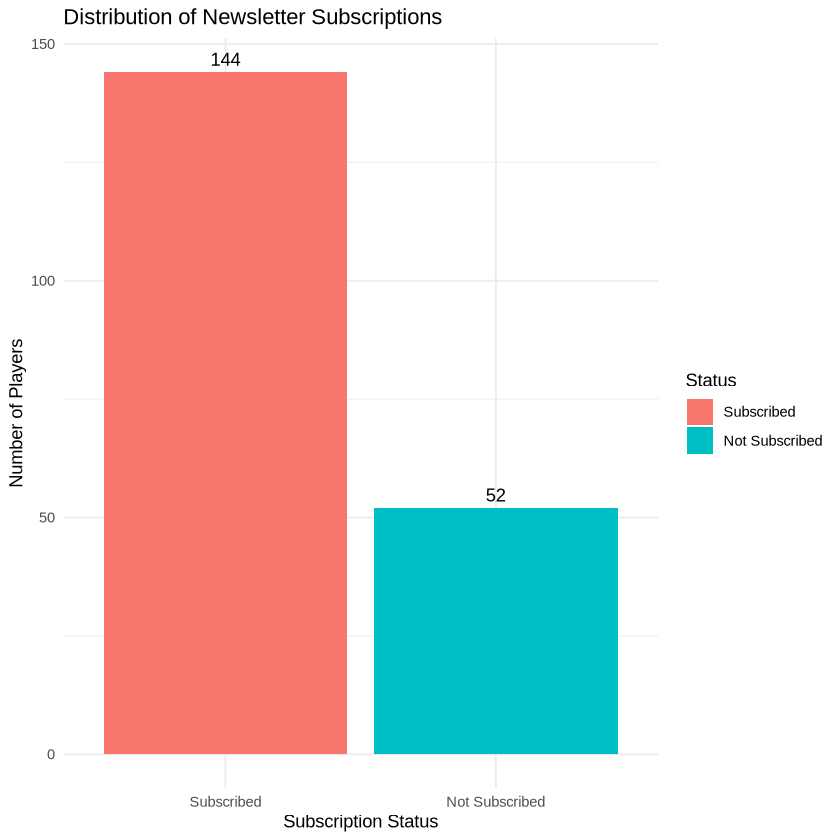

In [7]:
plot1 <- ggplot(analysis_data, aes(x = subscribe_status, fill = subscribe_status)) +
         geom_bar(stat = "count") +
         geom_text(stat = "count", aes(label = ..count..), vjust = -0.5) +
         labs(
             title = "Distribution of Newsletter Subscriptions",
             x = "Subscription Status",
             y = "Number of Players",
             fill = "Status") +
         theme_minimal()
plot1

The plot shows that 144 players (73.5%) are subscribed, while 52 (26.5%) are not. This is imbalanced, which means that simple `accuracy` is a poor evaluation metric for the model. Metrics derived from the confusion matrix, such as `precision` and `recall` are better suited for imbalanced data.

#### Plot 2: Distribution of Played Hours by Subscription Status

Warning message in scale_x_log10(labels = scales::label_number_auto()):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


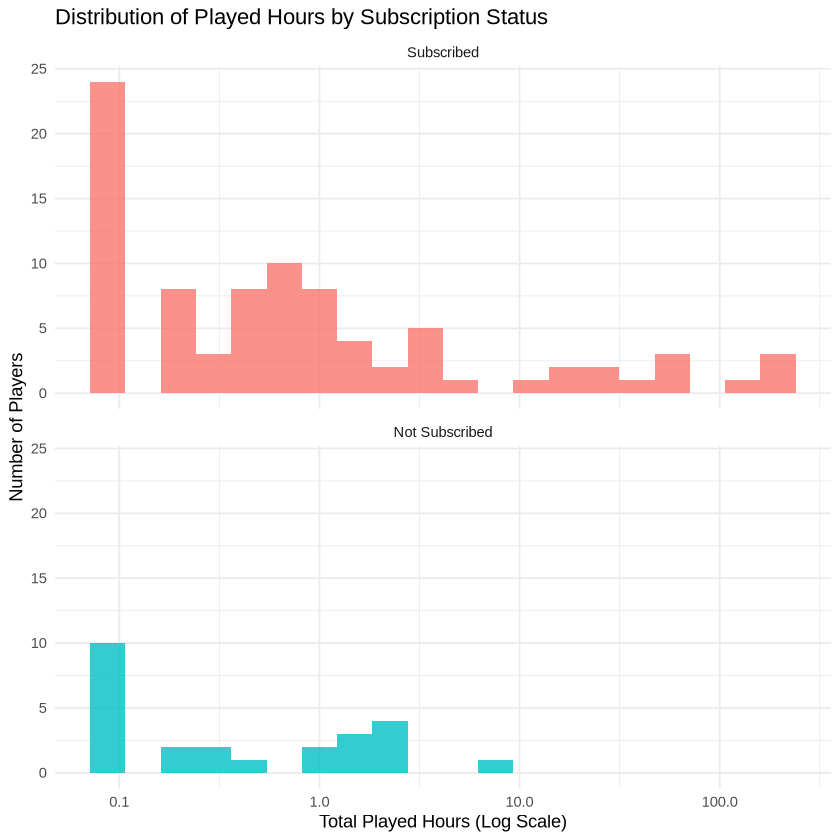

In [8]:
plot2 <- ggplot(analysis_data, aes(x = played_hours, fill = subscribe_status)) +
         geom_histogram(bins = 20, alpha = 0.8, show.legend = FALSE) +
         facet_wrap(~ subscribe_status, ncol = 1) +
         scale_x_log10(labels = scales::label_number_auto()) +
         labs(
             title = "Distribution of Played Hours by Subscription Status",
             x = "Total Played Hours (Log Scale)",
             y = "Number of Players") +
         theme_minimal()
plot2

The "Not Subscribed" group is heavily concentrated near zero hours, while the "Subscribed" group has a much wider distribution of play time. This suggests `played_hours` is a strong predictive variable.

#### Plot 3: Distribution of `avg_session_duration` by Subscription

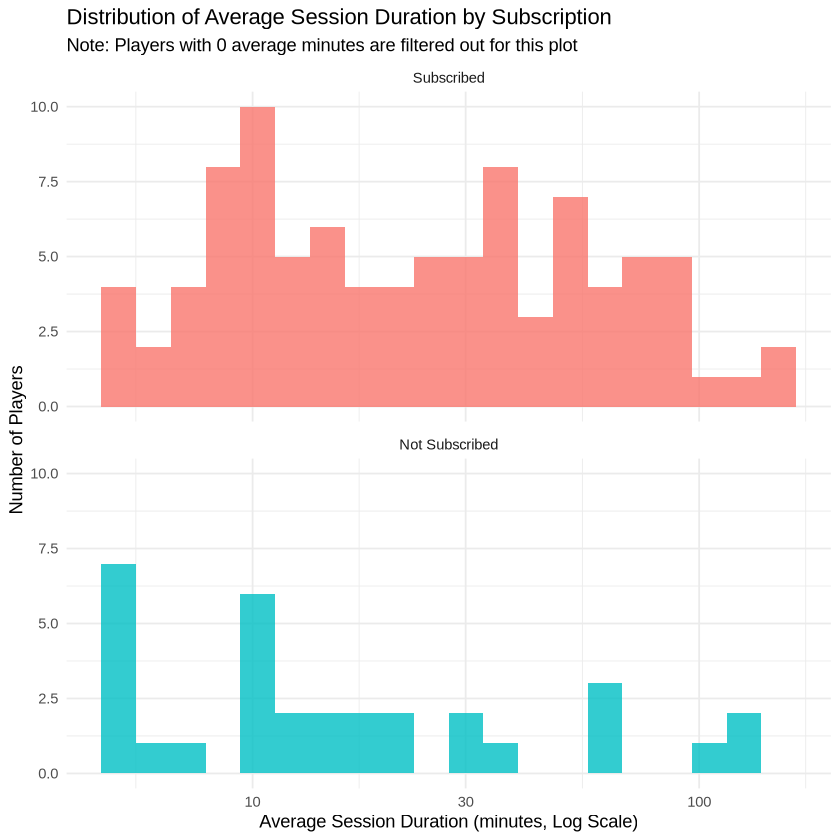

In [9]:
plot3_data <- analysis_data |>
  filter(avg_session_duration > 0)

plot3 <- ggplot(plot3_data, aes(x = avg_session_duration, fill = subscribe_status)) +
  geom_histogram(bins = 20, alpha = 0.8, show.legend = FALSE) +
  facet_wrap(~ subscribe_status, ncol = 1) +
  scale_x_log10(labels = scales::label_number_auto()) +
  labs(
    title = "Distribution of Average Session Duration by Subscription",
    subtitle = "Note: Players with 0 average minutes are filtered out for this plot",
    x = "Average Session Duration (minutes, Log Scale)",
    y = "Number of Players") +
  theme_minimal()
plot3

The "Subscribed" group shows a tendency for longer sessions. This suggests `avg_session_duration` is also a useful predictive variable.

### (4) Methods and Plan